In [11]:
from qiskit import *
from qiskit.visualization import plot_bloch_vector
import numpy as np

**Introduction to Quantum Mechanics Part 1: Quantum States and the Schrödinger Equation**

As you probably already know, quantum computing exploits the strange and amazing properties of quantum systems in order to make the process of solving certain computational problems more efficient. Because of this, in order to fully appreciate and understand quantum computation and the underlying nature of the qubits that allow quantum computers to function, it is important to have at least a introductory understanding of quantum mechanics! In addition, in order to study the field of **quantum hardware** and actually understand how quntum computers are constructed and function on a physical level, a solid understanding quantum mechanics is crucial.

This section of the textbook will dive into some of the most basic concepts in quantum mechanics, to hopefully give the reader a decent understanding of how things behave on the quantum level.

**Quantum States and Observables**

In order to begin our discussion of quantum mechanics, we have to talk a little bit about the idea of a **quantum state**. A quantum state is essentially jusst a vector that is living out in some Hilbert space of all possible quantum states corresponding to the quantum system. For instance, for a single qubit, we represent the states as vectors with lying on the surface of the Bloch sphere, and the Hilbert space of states being the surface of the sphere itself:

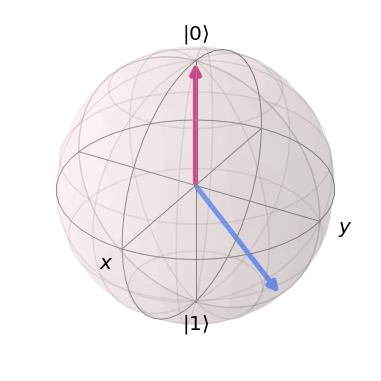

In [10]:
plot_bloch_vector([[0, 0, 1], [0, np.sqrt(0.5), -np.sqrt(0.5)]])

The quantum state vector allows us to essentially "encode" the information for our system in a mathematical object. As we will demonstrate throughout this section of the textbook, the state vector is of incredible importance in the study of quantum mechanics, as it is usually the quantity which we are manipulating, and of which we are trying to find the "components" (this will make more sense soon).

When we are dealing with quantum mechanical state vectors, we are usually interested in physical quantities associated with quantum systems in this particular state. Thus, we assert that every physical observable corresponds to some **Hermitian operator**. By computing inner products of these operators corresponding to different observables, we can calculate the **expectation value** of different physical measurements. We will discuss observables more in the next section.

**Determinate States**

Now that we have looked into quantum states, as well as observables, we are in a position to discuss a very import concpet known as an **eigenstate**, or a **determinate state**. Let's say we have some observable operator, $\hat{Q}$, and we decide to investigate the following eigenvector-eigenvalue relationship:

<br>
$$\hat{Q} |q\rangle \ = \ q |q\rangle$$
<br>

It is said that the state vector $|q\rangle$ is a definite state of the observable $\hat{Q}$, corresponding to the eigenvalue $q$. That is, if we ever perform a measurement of the observable corresponding to $\hat{Q}$ upon $|q\rangle$, we will get an value corresponding to $q$. This is actually fairly easy to demonstrate. If we have some observable $\hat{Q}$ and we want to find all of the state vectors that always return a measurement of $q$, all we have to do is make the observation that if this is true, it is necessarily true that the variance of our observable (which, in this case, we treat as some random variable) is equal to $0$. Thus:

<br>
$$\text{Var}(\hat{Q}) \ = \ \langle (\hat{Q} \ - \ \langle Q \rangle)^2 \rangle \ = \ \langle q | (\hat{Q} \ - \ \langle Q \rangle)^2 | q \rangle \ = \ (\hat{Q} \ - \ \langle Q \rangle) \langle q | (\hat{Q} \ - \ \langle Q \rangle) | q \rangle$$
<br>

Notice how I am able to move one of the $\hat{Q} \ - \ \langle Q \rangle$ terms around to the left side of the expectation value. The reason this is allowed is because $\hat{Q}$ is Hermitian. If the reader happens to be super super keen on proving everything, we can prove that $\hat{Q} \ - \ \langle Q \rangle$ is Hermitian if $\hat{Q}$ is a Hermitian observable. Since $\hat{Q}$ is an observable it's expectation value will always be real (after all, we would never measure position, momentum, etc. to be a complex number!). Thus, we have:

<br>
$$\hat{Q} \ - \ \langle Q \rangle \ = \ \hat{Q} \ - \ \langle Q \rangle \mathbb{I} \ = \ \hat{Q} \ - \ \text{diag}(\langle Q \rangle, \ ..., \ \langle Q \rangle)$$
<br>

Since the matrix that we are subtracting from the original Hermitian matrixed only has real entries, all of which are along the diagonal and are therefore unaffected by the conjugate transpose operation, this new matrix is also Hermitian.

Going back to the original problem at hand, we have shown that:

<br>
$$(\hat{Q} \ - \ \langle Q \rangle) \langle q | (\hat{Q} \ - \ \langle Q \rangle) | q \rangle \ = \ 0$$
<br>


First, note that if we are trying to find all $|q\rangle$ that return a measurement of $q$, it is necessarily true that $\langle \hat{Q} \rangle \ = \ q$ (the only measurement we ever get when evaluating measuring $\hat{Q}$ is $q$, what else could the expecation value be?!) Recall from back in the Linear Algebra Primer, the definition of a Hilbert space: the inner product of a vector with itself is only ever $0$ if the vector is itself the null vector. Well, in order for this to be true, we must have:

<br>
$$(\hat{Q} \ - \ \langle Q \rangle) | q \rangle \ = \ \hat{Q} |q\rangle \ - \ q |q\rangle \ = \ 0 \ \Rightarrow \ \hat{Q} |q\rangle \ = \ q |q\rangle$$
<br>

It is very important to note what these determinate states actually mean. These are quantum states that correspond to **allowed measurement quantities**. Specifically, if I have any quantum state $|\psi\rangle$, and I want to take a measurement of an observable corresponding to $\hat{Q}$, I know that my measured result will be one of the eigenvalues of $\hat{Q}$, and upon measurement, I will "collapse" the quantum state into the eigenstate of $\hat{Q}$ that corresponds to the measured eigenvalue!

For instance, we can define the **position operator** as the Hermitian operator $\hat{x}$ that yields the following eigenvalue/eigenstate relationship:

<br>
$$\hat{x} |x\rangle \ = \ x|x\rangle$$
<br>

**Expansion of Quantum States**

If you recall from back in the Linear Algebra Primer, we talked a little bit about the geometric significance behind the inner product. Informally, the inner product between a bra and a corresponding ket in Hilbert space, written like this:

<br>
$$\langle \phi | \theta \rangle$$
<br>

Will tell us "how much of the vector $|\phi\rangle$ lies along the vector $|\theta\rangle$". Now, let's say I have some general state vector representing a quantum system called $|\psi\rangle$, and I perform the inner product between the state vector and the bra corresponding to some arbitrary position eigenstate, $|x\rangle$:

<br>
$$\langle x | \psi \rangle$$
<br>

Well, this will tell me how much of the determinate state of position corresponding to the position measurement $x$ is contained within $|\psi\rangle$. There is a special name for this quantity, called the **position-space wavefunction**, denoted as $\Psi(x, \ t)$ (in general, there is a time-dependence introduced into the wavefunction). The following quantity of of particular interest:

<br>
$$P \ = \ |\Psi(x, \ t)|^2 \text{dx}$$
<br>

This tells us the probability of finding our "quantum system" (for instance, a particle) in the position range of $x$ to $x \ + \ \text{dx}$ at time $t$. Thus, the modulus squared of the wavefunction, $P$, is a **probability density**, it doesn't really have that much meaning unless we integrate over multiple values of it to find the probability of our particle being in a certain range of positions.

This is already really cool, but we can actually generalize this idea to any determinate state. We can assert that if we have some quantum state vector $|\psi\rangle$, and we want to find the probability that a measurement of some observable quantity corresponding to the observable operator $\hat{Q}$ upon $|\psi\rangle$ will return $q$, then we simply have to calculate the quantity:

<br>
$$P(q) \ = \ |\langle q | \psi \rangle |^2$$
<br>

Where $|q\rangle$ is the eigenstate of $\hat{Q}$ corresponding to $q$. This, however, only applys to observables with a discret spectrum (a discrete set of eigenstates). If the set of eigenstates is continuous, like the eigenstates of the position operator, then we are interested in the quantity:

<br>
$$P(q) \ = \ |\langle q | \psi \rangle |^2 \text{d}q$$
<br>

Which returns the probability of measuring a result in the range of $q$ to $q \ + \ \text{d}q$.

We will now demonstrate another way in which the state vector can be expanded. We will assert that for any complete set of orthonormal basis vectors (which we will assume is discrete, denoted as $\{|v_1\rangle, \ ..., \ |v_n\rangle\}$), the following relationship holds true:

<br>
$$\displaystyle\sum_{i} \ |v_i\rangle \langle v_i| \ = \ \mathbb{I}$$
<br>

Or for a continuous set of basis vectors:

<br>
$$\displaystyle\int \ |i\rangle \langle i| \ \text{d}i \ = \ \mathbb{I}$$
<br>

We will prove this for the discrete version (the continuous version follows, and I don't want to spend too much time here). Let the set $\{|v_1\rangle, \ ..., \ |v_n\rangle\}$ be an orthonormal basis for some vector space $V$. We then recall that some vector $|v\rangle \ \in \ V$ can be written as a linear combination of our basis vectors:

<br>
$$|v\rangle \ = \ \displaystyle\sum_{i} \ v_i | v_i \rangle$$
<br>

Let us now take our "outer product operator", apply it to our vector, and see what happens:

<br>
$$\displaystyle\sum_{i} \ |v_i\rangle \langle v_i|v\rangle \ = \ \displaystyle\sum_{i} \ v_i |v_i\rangle \ = \ |v\rangle$$
<br>

Because $\langle v_i | v\rangle \ = \ v_i$, we just get the original vector, thus:

<br>
$$\displaystyle\sum_{i} \ |v_i\rangle \langle v_i|v\rangle \ = \ \mathbb{I}$$
<br>

Now, for the purposes of this discussion, we are going to make a couple of assumptions, the first being that the set of eigenstates for some observable forms an orthonormal basis for our Hilbert space of quantum state vectors. If we decide to take our basis to be the set of all position eigenstates, $|x\rangle$, then we can easily expand any state vector as a sort of linear combination of eigenstates:

<br>
$$|\psi\rangle \ = \ \mathbb{I} |\psi\rangle \ = \ \Bigg( \displaystyle\int \ |x\rangle \langle x| \ \text{d}x \Bigg) |\psi\rangle \ = \ \displaystyle\int \ |x\rangle \langle x| \psi \rangle \ \text{d}x \ = \ \displaystyle\int \ \Psi(x, \ t) |x\rangle \ \text{d}x$$
<br>

And so we have found another interpretation of our position-space wavefunction, each is an expansion coefficient when representing our state vector as a linear combination of position eigenstates. When you think about it intuitively, it makes sense that this is the case, as the wavefunction tells us "how much" of each of the different values of $|x\rangle$ is contained within our state vector!

**Time-Evolution of the Wavefunction and the Schrödinger Equation**

Now that we have been introduced to the idea of the wavefunction as the state vector expanded in the basis of a determinate position state, let's switch gears and consider a very important idea in quantum mechanics: **The Schrödinger Equation**:

<br>
$$i\hbar \frac{\text{d}}{\text{d}t} |\Psi\rangle \ = \ \hat{H} |\Psi\rangle$$
<br>

Where $\hat{H}$ is the **Hamiltonian**, an operatoer that corresponds to a measurement of the **total energy** of a quantum system. We will mostly be interested in the Schrödinger equation expressed in the position basis, thus we can write:

<br>
$$\langle x | i\hbar \frac{\text{d}}{\text{d}t} |\Psi\rangle \ = \ \langle x | \hat{H} |\Psi\rangle \ \Rightarrow \  i\hbar \frac{\text{d}}{\text{d}t} \langle x |\Psi\rangle \ = \ \hat{H} \langle x |\Psi\rangle \ = \ i\hbar \frac{\text{d}}{\text{d}t} \Psi(x, \ t) \ = \ \hat{H} \Psi(x, \ t)$$
<br>


Notice that we are allowed to move the Hamiltonian operator around, due to it being Hamiltonian. Now, in order to represent the total energy of a quantum system, we require a sum of kinetic and potential energy, just like in classical mechanics, thus:

<br>
$$\hat{H} \ = \ T \ + \ V \ = \ \frac{\hat{p}^2}{2m} \ + \ V$$
<br>

Now, we will take as a postulate (sort of, this can be arrived at in more rigorous ways, but I want to avoid going down any more rabbit holes in this section) that in the position basis:

<br>
$$\hat{p} \ = \ \frac{\hbar}{i} \frac{\text{d}}{\text{d}x}$$
<br>

Then, we have:

<br>
$$\frac{\hat{p}^2}{2m} \ + \ V \ = \ -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \ + \ V$$
<br>

Thus, we finally have:

<br>
$$i\hbar \frac{\partial \Psi}{\partial t} \ = \ -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi}{\partial x^2} \ + \ V\Psi$$
<br>

This is the equation upon which a large part of quantum mechanics is based. Essentially, if we solve this equation, it allows us to determine the particular wavefunction of a system, given some potential field $V$ acting upon our system. For most cases, the Schrödinger equation in this form is incredibly difficult to solve, thus we simplify. For instance, we can make the assumption that our wavefunction separates into two different functions, independently governed by the variables $x$ and $t$:

<br>
$$\Psi(x, \ t) \ = \ \psi(x) \phi(t)$$
<br>

Plugging this back into the original equation, we get:

<br>
$$i\hbar \psi \frac{\partial \phi}{\partial t} \ = \ -\phi \frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} \ + \ V \psi \phi \ \Rightarrow \ i\hbar \frac{1}{\phi} \frac{\partial \phi}{\partial t} \ = \ -\frac{1}{\psi} \frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} \ + \ V$$
<br>

Now, if we assume out potential function $V$ only depends on $x$, we have an equation that is separated in terms of variables. We can then equate each side of the equation to some separation constant. Consider if one of the dependent variables changed but the other didn't. Then, the equation would no longer hold true. We can only avoid this if both sides of the equation are equal to some constant, thus:

<br>
$$i\hbar \frac{1}{\phi} \frac{\partial \phi}{\partial t} \ = \ E$$
<br>
$$-\frac{1}{\psi} \frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} \ + \ V \ = \ E$$
<br>

For the first equation, we can solve fairly easily to get the **time-dependent** component of the wavefunction:

<br>
$$\frac{1}{\phi} \frac{\partial \phi}{\partial t} \ = \ -\frac{iE}{\hbar} \ \Rightarrow \ \displaystyle\int \ \frac{1}{\phi} \text{d}\phi \ = \ \displaystyle\int -\frac{iE}{\hbar} \ \text{d}t \ \Rightarrow \ \phi(t) \ = \ Ae^{-\frac{iEt}{\hbar}}$$
<br>

We can absorb $A$ into the normalization coefficient when we introduce time-dependence into our wavefunction, thus the general form for the time-dependent component of a wavefunction is:

<br>
$$\phi(t) \ = \ e^{-\frac{iEt}{\hbar}}$$
<br>

In order to solve the second equation, we require potential, $V(x)$:

<br>
$$-\frac{\hbar^2}{2m} \frac{\text{d}^2 \psi}{\text{d}x^2} \ + \ V \psi \ = \ E \psi$$
<br>

And our final wavefunction is of the form:

<br>
$$\Psi(x, \ t) \ = \ e^{-\frac{iEt}{\hbar}} \psi(x)$$
<br>

**Bring It Together: Stationary States**

Now that we have seen how the Schrödinger equation can be used to find the evolution of the state vector, and thus the wavefunction, let's consider the second equation we found in a bit more detail:

<br>
$$-\frac{\hbar^2}{2m} \frac{\text{d}^2 \psi}{\text{d}x^2} \ + \ V \psi \ = \ E \psi$$
<br>

As we showed before, we can also write this equation as:

<br>
$$\hat{H} \psi \ = \ E \psi$$
<br>

Remembering that $\hat{H}$ is the operator corresponding to total energy, and this relationship is an **eigenvector-eigenvalue** relationship, it follows that the eigenfunctions $\psi(x)$ are state of **total definite enrgy** or **energy eigenstates**. These are states in which the total energy is the same for each measurement (this is the same definition as eigenstates for any other operator!). 

It also follows that the separation constant $E$ is the actually measured value of the total energy of our system corresponding to the wavefunction $\psi(x)$! I think this is a really good example of how we can relate together two sides of the same coin: the formalism we discussed initially, and obtaining the wavefunction through the Schrödinger equation!

**Example: The Quantum Harmonic Oscillator**

Now that we've looked a little bit into what the wavefunction is and how it evolves according to the Schrödinger equation, let's look at a specific example of the allowed energies and the wavefunctions of a quantum system (a particle) in a certain potential field, $V(x)$. Specifically, we are going to be investigating the **quantum harmonic oscillator**, which is the quantum analogue to the classical harmonic oscillator.

Imagine a spring attached to a wall with an oscillating mass. This mass/spring system is undergoing simple harmonic motion, with the total energy of the system being the mass's kinetic energy and the potential energy stored in the spring:

<br>
$$E_{tot} \ = \ \frac{p^2}{2m} \ + \ \frac{1}{2} kx^2$$
<br>

But since the angular frequency of the system, $\omega$, is given by:

<br>
$$\omega \ = \ \sqrt{\frac{k}{m}}$$
<br>

We have:

<br>
$$\frac{1}{2} kx^2 \ = \ \frac{1}{2} m \omega^2 x^2 \ \Rightarrow \ E_{tot} \ = \ \frac{p^2}{2m} \ + \ \frac{1}{2} m \omega^2 x^2$$
<br>

This is analogous to the Hamiltonian we will use to describe our quantum harmonic oscillator. Specifically, we are interested in the potential term, $\frac{1}{2} m \omega^2 x^2$. From this, the time-independent Schrödinger equation becomes:

<br>
$$-\frac{\hbar}{2m} \frac{\text{d}^2 \psi}{\text{d}x^2} \ + \ \frac{1}{2} m \omega^2 x^2 \psi \ = \ E \psi$$
<br>

To solve the Schrödinger equation in this form, we can actually exploit an algebraic trick. We define two new operators, called the **creation** and **annihilation** operators, defined respectively as $\hat{a}_{+}$ and $\hat{a}_{-}$:

<br>
$$\hat{a}_{\pm} \ = \ \frac{1}{\sqrt{2m\hbar\omega}} \Big( \mp ip \ + \ m\omega x \Big)$$
<br>

The idea is to, in a sense, factor the Hamiltonian. I'm not going to go through the calculations, but when we multiply $\hat{a}_{+}$ by $\hat{a}_{-}$, and we remember to evaluate the commutator between $x$ and $p$, then write the original Hamiltonian in terms of this product, we get:

<br>
$$H \ = \ \Big( \hat{a}_{+} \hat{a}_{-} \ + \ \frac{1}{2} \Big) \hbar\omega$$
<br>

Now, we come to the most important part of this section. We assert that if $H \psi \ = \ E \psi$ (if we have some wavefunction that is a stationary state of the quantum harmonic oscillator Hamiltonian), then the now wavefunction $\hat{a}_{+} \psi$ will also be a stationary state satisfying the relationship $H (\hat{a}_{+} \psi) \ = \ (E \ + \ \hbar\omega)(\hat{a}_{+} \psi)$. We can actually prove an even stronger condition: that this "ladder" of states forms the **complete** set of wavefunction for the quantum harmonic oscillator, however, we won't do that here. Anyways, let's do this proof:

<br>
$$H (\hat{a}_{+} \psi) \ = \ \Big( \hat{a}_{+} \hat{a}_{-} \ + \ \frac{1}{2} \Big) \hbar\omega (\hat{a}_{+} \psi) \ = \ \Big( \hat{a}_{+} \hat{a}_{-} \hat{a}_{+} \ + \ \frac{1}{2} \hat{a}_{+} \Big) \hbar\omega \psi \ = \ \hat{a}_{+} \Big( \hat{a}_{-} \hat{a}_{+} \ + \ \frac{1}{2} \Big) \hbar\omega \psi$$
<br>

Now, it is easy to show that $[\hat{a}_{-}, \ \hat{a}_{+}] \ = \ \hat{a}_{-} \hat{a}_{+} \ - \ \hat{a}_{+} \hat{a}_{-} \ = \ 1$. I won't do this here, but you can easily verify this yourself. Thus, it follows that $\hat{a}_{-} \hat{a}_{+} \ = \ \hat{a}_{+} \hat{a}_{-} \ + \ 1$, and we get:

<br>
$$\hat{a}_{+} \Big( \hat{a}_{-} \hat{a}_{+} \ + \ \frac{1}{2} \Big) \hbar\omega \psi \ = \ \Big( \hat{a}_{+} \hat{a}_{-} \ + 1 \ + \ \frac{1}{2} \Big) \hbar\omega \psi \ = \ \hat{a}_{+} (H \ + \ \hbar\omega) \psi \ = \ \hat{a}_{+} (E \ + \ \hbar\omega) \psi \ = \ (E \ + \ \hbar\omega) \hat{a}_{+} \psi$$
<br>

We can prove something similar for $\hat{a}_{-}$, demonstrating that applying $\hat{a}_{-}$ to the wavefunction makes the energy "step down" by magnitude $\hbar\omega$. Now, if we assume there is some ground state $\psi_0$, such that $\hat{a}_{-} \psi_{0} \ = \ 0$, then it follows that the ground state energy is:

<br>
$$H \psi_0 \ = \ E \psi_0 \ \Rightarrow \ E \psi_0 \ = \ \Big( \hat{a}_{+} \hat{a}_{-} \psi \ + \ \frac{1}{2} \psi \Big) \ = \ \Big( \hat{a}_{+} (0) \ + \ \frac{1}{2} \psi \Big) \ = \ \frac{1}{2} \hbar\omega \psi \ \Rightarrow \ E_0 \ = \ \frac{1}{2} \hbar\omega$$
<br>

So all of the enrgies are given by:

<br>
$$E_n \ = \ \Big(n \ + \ \frac{1}{2} \Big) \hbar \omega$$
<br>

Another important thing to note is that:

<br>
$$E_n \psi \ = \ H \psi \Rightarrow \ \Big(n \ + \ \frac{1}{2} \Big) \hbar \omega \psi \ = \ \Big(\hat{a}_{+} \hat{a}_{-} \ + \ \frac{1}{2} \Big) \hbar \omega \psi \ \Rightarrow \ \hat{a}_{+} \hat{a}_{-} \psi \ = \ n \psi$$
<br>

And from the commutator that we previously calculated:

<br>
$$\hat{a}_{-} \hat{a}_{+} \psi \ = \ (1 \ + \ \hat{a}_{+} \hat{a}_{-}) \psi \ = \ (1 \ + \ n) \psi$$
<br>

When it comes to finding the normalized wavefunctions for each energy level, we can simply setup the follwing relationship: consider the normalized wavefunction $c_n \psi_n$. If we want to find the normalized wavefunction of the next energy, $c_{n \ + \ 1} \psi_{n \ + \ 1}$, we know that the follwing will be true:

<br>
$$c_{n \ + \ 1} \psi_{n \ + \ 1} \ = \ c_{n \ + \ 1} a_{+} \psi_n$$
<br>

Notice how we drop the $c_n$ from $\psi_n$. This is because we want to find each of the normalization coefficients in terms of the other ones, giving us a recurrence relation (we want $c_n$ to be included in $c_{n \ + \ 1}$). Now, remember $\psi \ = \ \langle x | \psi \rangle$. The idea is to then do the following:

<br>
$$\displaystyle\int |c_{n \ + \ 1}|^2 \langle \psi_{n \ + \ 1} | x \rangle \langle x | \psi_{n \ + \ 1} \rangle  \ \text{d}x \ = \ \displaystyle\int \ |c_{n \ + \ 1}|^2 \langle \psi_n | x \rangle a_{-} a_{+} \langle \psi_n | x \rangle \ \text{d}x \ = \ \displaystyle\int \ |c_{n \ + \ 1}|^2 \langle \psi_n | x \rangle (1 \ + \ n) \langle \psi_n | x \rangle \ \text{d}x \ = \ |c_{n \ + \ 1}|^2 (n \ + \ 1) \ \displaystyle\int \psi^{*} \psi \ \text{d}x$$
<br>

But since $\psi_n$ isn't normalized, we know that the modulus squared is given by:

<br>
$$|c_n|^2 \psi^{*} \psi \ = \ 1 \ \Rightarrow \ \psi^{*} \psi \ = \ \frac{1}{|c_n|^2}$$
<br>

And so we get:

<br>
$$\frac{|c_{n \ + \ 1}|^2}{|c_n|^2} (n \ + \ 1) \ = \ 1 \ \Rightarrow \ c_{n \ + \ 1} \ = \ \frac{c_n}{\sqrt{n \ + \ 1}}$$
<br>

Thus, if we assume $c_0$ is known (which it is, from solving the ground state equation $\hat{a}_{-} \psi_0 \ = \ 0$, we get:

<br>
$$c_n \ = \ \frac{c_0}{\sqrt{n!}}$$
<br>

And our wavefunctions for each energy level are then given by:

<br>
$$\psi_n \ = \ \frac{c_0}{\sqrt{n!}} (\hat{a}_{+})^n \psi_0$$
<br>